1 1 val_loss:  4.55772733416
1 2 val_loss:  3.37285823905
1 3 val_loss:  2.74860353498
1 4 val_loss:  2.37998772279
1 5 val_loss:  2.14336137149
1 6 val_loss:  1.9813874132
1 7 val_loss:  1.86467149014
1 8 val_loss:  1.77694093638
1 9 val_loss:  1.7086289479
1 10 val_loss:  1.65383233557
1 11 val_loss:  1.60875923052
1 12 val_loss:  1.5708887492
1 13 val_loss:  1.53849362281
1 14 val_loss:  1.51035798478
1 15 val_loss:  1.48560480905
1 16 val_loss:  1.46358726697
1 17 val_loss:  1.44381853268
1 18 val_loss:  1.42592535673
1 19 val_loss:  1.40961669429
1 20 val_loss:  1.39466208057
1 21 val_loss:  1.38087644611
1 22 val_loss:  1.36810926768
1 23 val_loss:  1.35623668973
1 24 val_loss:  1.34515571544
1 25 val_loss:  1.33477986229
1 26 val_loss:  1.32503586957
1 27 val_loss:  1.31586117203
1 28 val_loss:  1.30720193895
1 29 val_loss:  1.29901153581
1 30 val_loss:  1.29124930537
1 31 val_loss:  1.28387959288
1 32 val_loss:  1.27687095987
1 33 val_loss:  1.27019554494
1 34 val_loss:  1.2638

3 76 val_loss:  1.07064348091
3 77 val_loss:  1.06939659345
3 78 val_loss:  1.06818079758
3 79 val_loss:  1.06699502387
3 80 val_loss:  1.06583825251
3 81 val_loss:  1.06470951035
3 82 val_loss:  1.0636078683
3 83 val_loss:  1.06253243877
3 84 val_loss:  1.06148237342
3 85 val_loss:  1.06045686094
3 86 val_loss:  1.05945512506
3 87 val_loss:  1.05847642263
3 88 val_loss:  1.05752004188
3 89 val_loss:  1.05658530074
3 90 val_loss:  1.0556715453
3 91 val_loss:  1.05477814835
3 92 val_loss:  1.05390450803
3 93 val_loss:  1.05305004652
3 94 val_loss:  1.05221420886
3 95 val_loss:  1.05139646181
3 96 val_loss:  1.05059629281
3 97 val_loss:  1.04981320891
3 98 val_loss:  1.04904673591
3 99 val_loss:  1.04829641741
3 100 val_loss:  1.047561814
4 1 val_loss:  4.51480921854
4 2 val_loss:  3.3532887437
4 3 val_loss:  2.72984215385
4 4 val_loss:  2.35515105548
4 5 val_loss:  2.11035863016
4 6 val_loss:  1.93989437631
4 7 val_loss:  1.81511361548
4 8 val_loss:  1.72007456834
4 9 val_loss:  1.64533

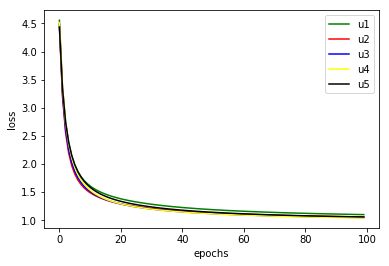

In [6]:
# write your code here
import numpy as np
import random
import matplotlib.pyplot as plt


def read_data(path):
    """
    读取数据
    :param path: 文件路径
    :return: 数据矩阵(943 * 1682)
    """
    ratings = [[0 for column in range(1682)] for row in range(943)]
    with open(path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        id, movie, rating = line.split('\t')[:3]
        ratings[int(id) - 1][int(movie) - 1] = float(rating)
    return np.array(ratings)


def matrix_factorize(data, k):
    """
    初始化用户因子矩阵和物品（电影）因子矩阵
    :param data: 训练集
    :param k: 潜在特征数
    :return: 用户因子矩阵和物品（电影）因子矩阵
    """
    user_num = len(data)
    item_num = len(data[0])
    P = np.random.rand(user_num, k)
    Q = np.random.rand(item_num, k)
    return P, Q.T


def get_loss_update(Y, Y_pre, P, Q, K, learning_rate, Lambda):
    """
    更新参数
    :param Y: 训练集结果
    :param P: 用户因子矩阵
    :param Q: 物品（电影）因子矩阵
    :param K: 潜在特征数
    :param learning_rate: 学习率
    :param Lambda: 正则化系数
    :return: 更新后的用户因子矩阵，物品（电影）因子矩阵，和预测结果矩阵
    """

    counter = 0
    for row in range(len(Y)):
        for column in range(len(Y[row])):
            if Y[row][column] > 0:
                counter += 1
                eij = Y[row][column] - np.dot(P[row, :], Q[:, column])
                for k in range(K):
                    P[row][k] = P[row][k] + learning_rate * (2 * eij * Q[k][column] - Lambda * P[row][k])
                    Q[k][column] = Q[k][column] + learning_rate * (2 * eij * P[row][k] - Lambda * Q[k][column])
    return P, Q, np.dot(P, Q)


def get_val_loss(Y, Y_pre, P, Q):
    """
    获得在测试集上的loss
    :param Y: 测试集结果矩阵
    :param Y_pre: 预测结果矩阵
    :param P: 用户因子矩阵
    :param Q: 物品（电影）因子矩阵
    :return: 测试集上的loss
    """
    loss = 0
    counter = 0
    for row in range(len(Y)):
        for column in range(len(Y[row])):
            if Y[row][column] > 0:
                counter += 1
                loss += (Y[row][column] - Y_pre[row][column]) * (Y[row][column] - Y_pre[row][column])
                for k in range(K):
                    loss += Lambda / 2 * (pow(P[row][k], 2) + pow(Q[k][column], 2))
    return loss / counter


if __name__ == "__main__":

    # 初始化参数
    learning_rate = 0.0001
    Lambda = 0.01
    K = 20
    epoch = 100
    all_losses = []
    all_val_losses = []

    # 针对不同的训练集和测试集
    for counter in range(5):
        # losses = []
        val_losses = []

        # 读取数据
        train_data = read_data(r"E:\machine learning\lab4\ml-100k\ml-100k\u" + str(counter + 1) + ".base")
        test_data = read_data(r"E:\machine learning\lab4\ml-100k\ml-100k\u" + str(counter + 1) + ".test")

        # 初始化用户因子矩阵和物品（电影）因子矩阵
        P_user_k, Q_item_k = matrix_factorize(train_data, K)
        val_data = np.dot(P_user_k, Q_item_k)

        # 更新参数，获得loss
        for i in range(epoch):

            # 计算在测试集上的loss
            val_loss = get_val_loss(test_data, val_data, P_user_k, Q_item_k)
            val_losses.append(val_loss)
            print(counter + 1, i + 1, "val_loss: ", val_loss)

            # 更新参数
            P_user_k, Q_item_k, val_data = get_loss_update(train_data, val_data, P_user_k, Q_item_k,
                                                           K, learning_rate, Lambda)

        all_val_losses.append(val_losses)

    # loss随迭代次数的变化图
    # plt.plot(range(epoch * 2), losses, label="loss", color='red')
    plt.plot(range(epoch), all_val_losses[0], label="u1", color='green')
    plt.plot(range(epoch), all_val_losses[1], label="u2", color='red')
    plt.plot(range(epoch), all_val_losses[2], label="u3", color='blue')
    plt.plot(range(epoch), all_val_losses[3], label="u4", color='yellow')
    plt.plot(range(epoch), all_val_losses[4], label="u5", color='black')
    plt.xlabel("epochs")
    plt.ylabel('loss')
    plt.legend()
    plt.show()
